#### packages


In [ ]:
#empty

In [ ]:
!pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=0ea184a1e3fbf93569abd579e120368ab4cbe5c46f1cc1de19bb4a1c9b516cc0
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [ ]:
#automatic imports required packages as per usage in code
import pyforest

In [ ]:
#packages
!pip install tensorflow-probability
!pip install nbconvert

In [ ]:
import pandas as pd
import numpy as np

### DATA

#### import data

In [ ]:

#using official url to load data 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv'

data = pd.read_csv(url)

data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


#### data description 
taken from UCI:

Abstract: The AI4I 2020 Predictive Maintenance Dataset is a synthetic dataset that reflects real predictive maintenance data encountered in industry.

| Variable | Value |
| --- | --- |
|Data Set Characteristics:|  Multivariate, Time-Series|
|Number of Instances:|10000|
|Area:| Computer|
|Attribute Characteristics:|Real|
|Number of Attributes:|14|
|Date Donated:| 2020-08-30|
|Associated Tasks:| Classification, Regression, Causal-Discovery|
|Missing Values?| N/A|
|Number of Web Hits:|33135|

** Data Set Information: **

Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in industry to the best of our knowledge.



**Attribute Information:**

The dataset consists of 10 000 data points stored as rows with 14 features in columns
UID: unique identifier ranging from 1 to 10000
product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
torque [Nm]: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.
tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.

The machine failure consists of five independent failure modes
tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 â€“ 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).
heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the toolâ€™s rotational speed is below 1380 rpm. This is the case for 115 data points.
power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.
random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail


**Relevant Papers:**

Stephan Matzka, 'Explainable Artificial Intelligence for Predictive Maintenance Applications', Third International Conference on Artificial Intelligence for Industries (AI4I 2020), 2020 (in press)

In [ ]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
#for i in data:
    #print(data[i].unique())

In [ ]:
data.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

In [ ]:
#basic info about dataset
df = data
df.shape
df.index
df.columns
df.info()
df.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

UDI                        10000
Product ID                 10000
Type                       10000
Air temperature [K]        10000
Process temperature [K]    10000
Rotational speed [rpm]     10000
Torque [Nm]                10000
Tool wear [min]            10000
Machine failure            10000
TWF                        10000
HDF                        10000
PWF                        10000
OSF                        10000
RNF                        10000
dtype: int64

In [ ]:
df.sum()
df.cumsum()
df.min()
df.max()
df.describe()
df.mean()
df.median()

/usr/local/lib/python3.7/dist-packages/pyforest/__init__.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  install_nbextension,
/usr/local/lib/python3.7/dist-packages/pyforest/__init__.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  install_labextension,


UDI                        5000.5
Air temperature [K]         300.1
Process temperature [K]     310.1
Rotational speed [rpm]     1503.0
Torque [Nm]                  40.1
Tool wear [min]             108.0
Machine failure               0.0
TWF                           0.0
HDF                           0.0
PWF                           0.0
OSF                           0.0
RNF                           0.0
dtype: float64

#### preprocessing data

In [ ]:
#define X and y from df
# product id is unique for each data row and its not important
# but we have product type of 3 categories
# L, M, H are three types representing for low (50% of all products),
# medium (30%) and high (20%) as product quality variants respectively
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [ ]:
# converting this categorical data to numerical with class 0, 1, 2 for L,M,H respectively
# using OrdinalEncoder from sklearn for ordinal data of product quality variant 
# indicating l for low quality, m for medium quality, h for high quality
# one-hot encoding is not suitable for ordinal data
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df['Type'] = ordinal_encoder.fit_transform(df[['Type']])
df['Type'].unique()
# this gives categories converted into integers

array([2., 1., 0.])

In [ ]:
# these are original categories in data
ordinal_encoder.categories_

[array(['H', 'L', 'M'], dtype=object)]

In [ ]:
# this sorts all the categories present and assigns values to them in alphabetical order
# 0 for H
# 1 for L
# 2 for M
print(ordinal_encoder.inverse_transform([[0]]))
print(ordinal_encoder.inverse_transform([[1]]))
print(ordinal_encoder.inverse_transform([[2]]))

[['H']]
[['L']]
[['M']]


In [ ]:
df.describe()

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,1.19940,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,0.60023,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,0.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,1.00000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,1.00000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,2.00000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,2.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  float64
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(4), int64(9)

In [ ]:
# now make the final dataset to be used in NN
# remove the product id variable
# remaining attributes are of types either int64 or float64
df.drop('Product ID', axis=1, inplace=True)
df.drop('UDI', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  float64
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   TWF                      10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 937.6 KB


In [ ]:
## add mitosheet data visualization

#### mitosheet visualization code


In [ ]:
# exploring data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

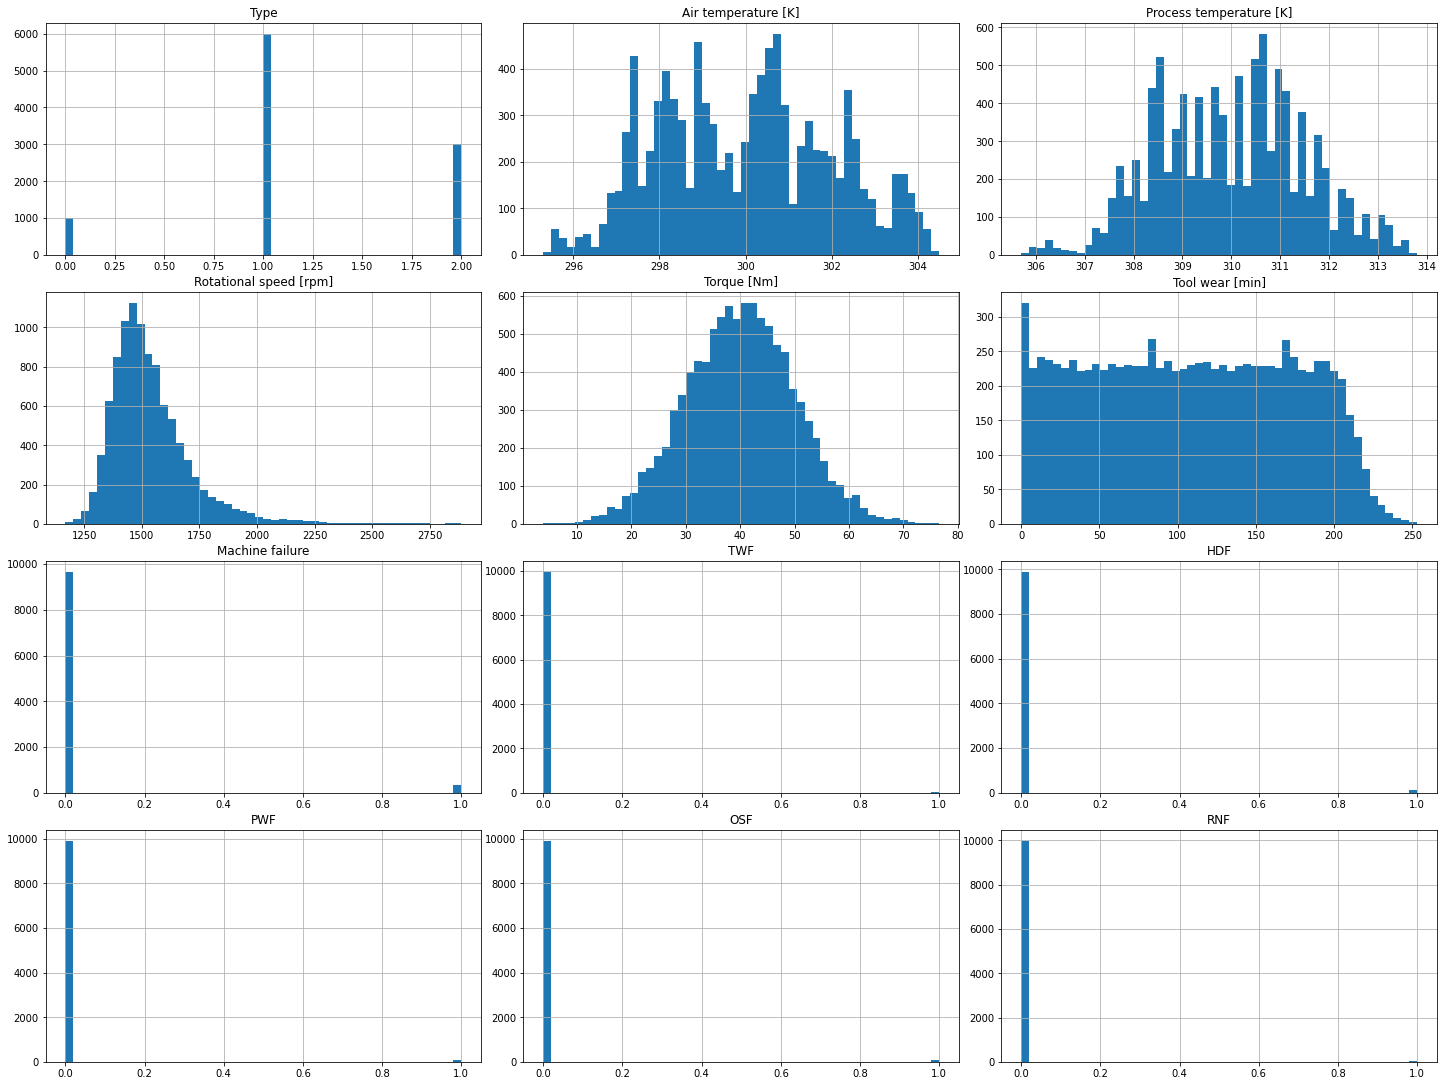

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.tight_layout(pad=0.4)
plt.show()

<IPython.core.display.Javascript object>

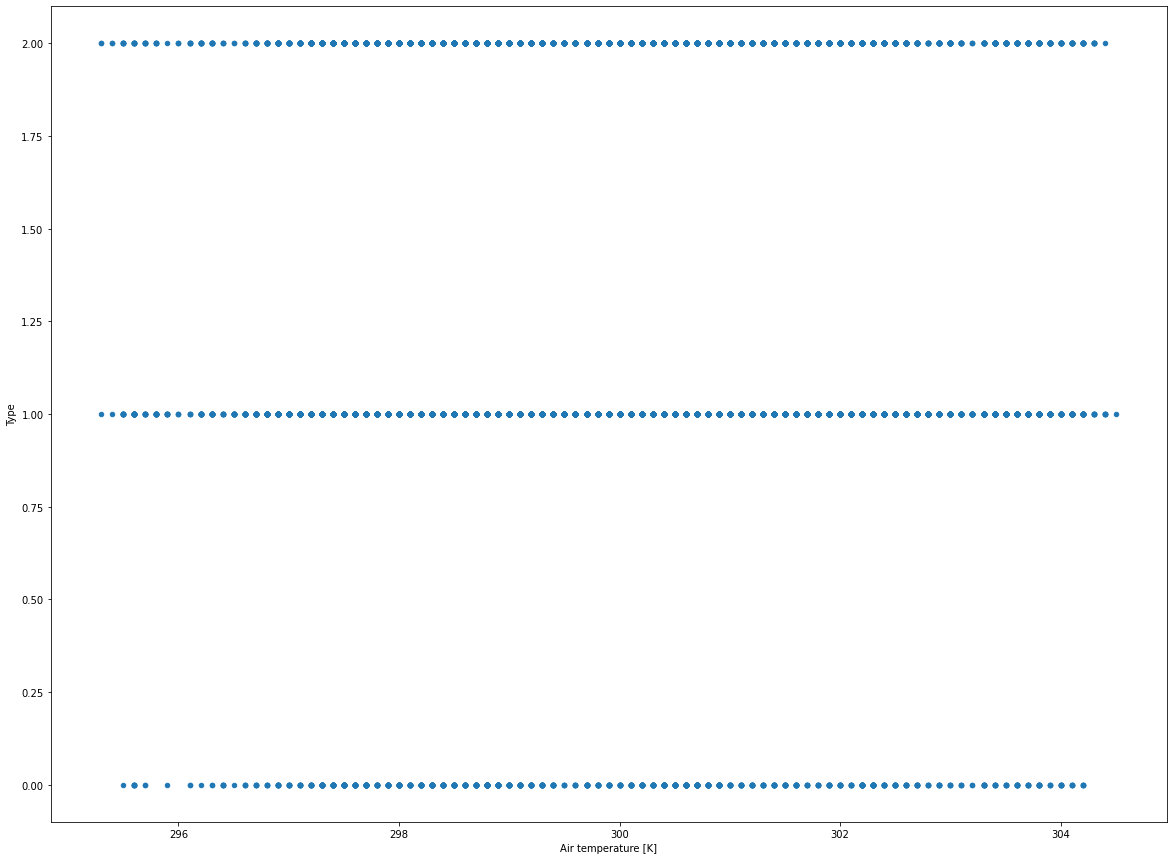

In [ ]:
df.plot.scatter(y = 'Type',x='Air temperature [K]', figsize=(20,15))
plt.show()

<IPython.core.display.Javascript object>

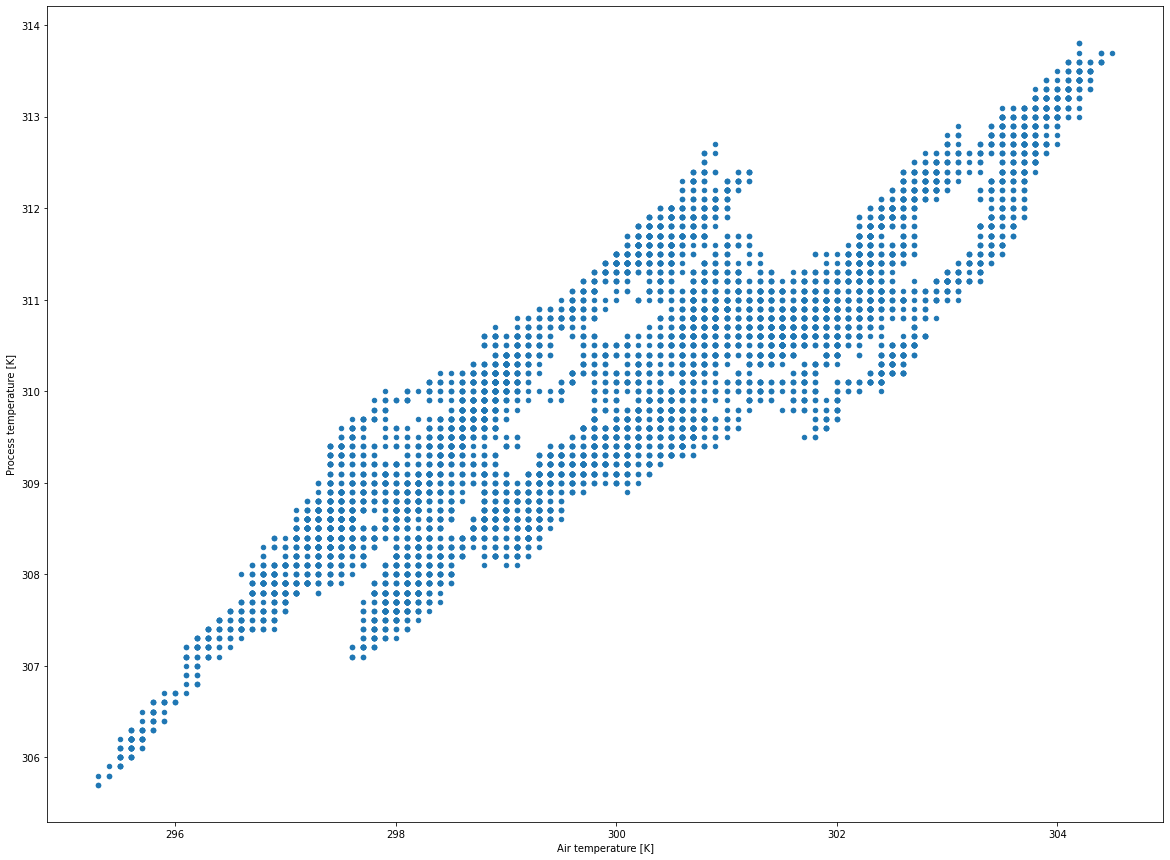

In [ ]:
df.plot.scatter(y = 'Process temperature [K]',x='Air temperature [K]', figsize=(20,15))
plt.show()

<IPython.core.display.Javascript object>

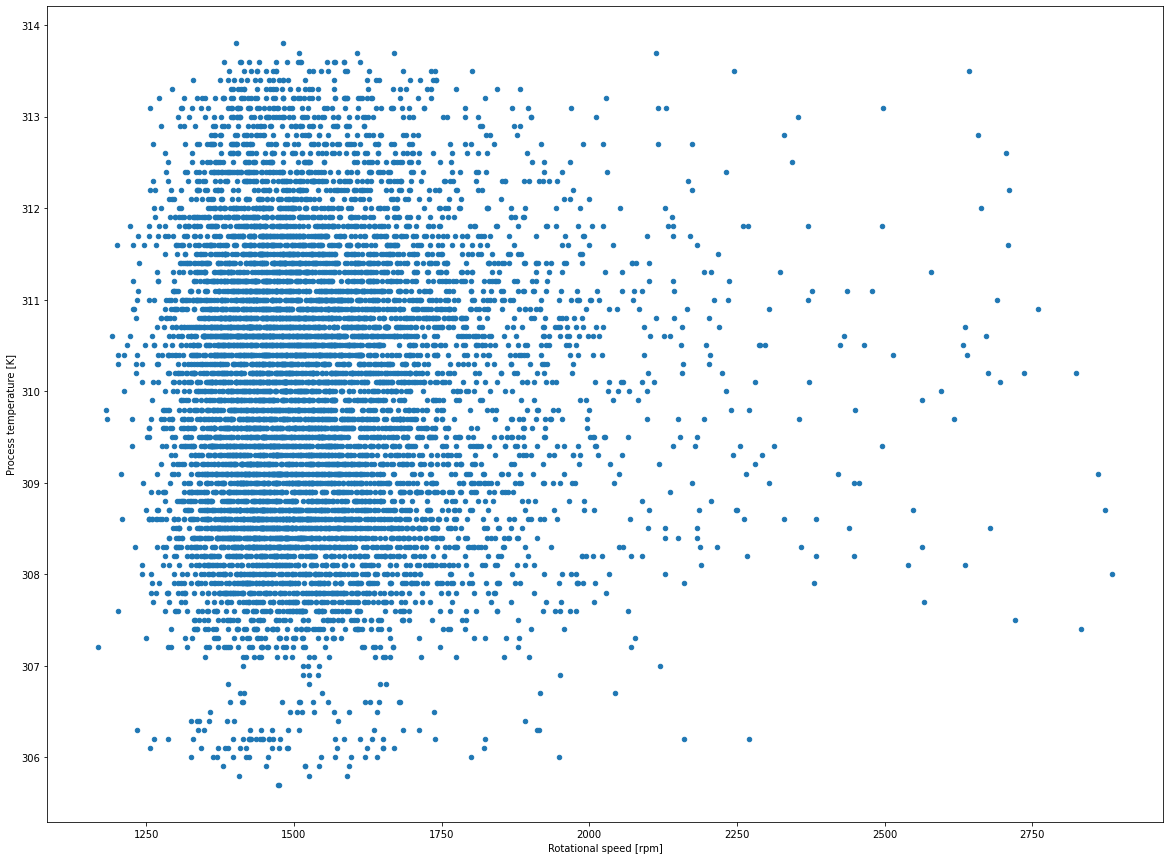

In [ ]:
df.plot.scatter(y = 'Process temperature [K]',x='Rotational speed [rpm]', figsize=(20,15))
plt.show()

In [ ]:
#confusion matrix

                             Type  Air temperature [K]  \
Type                     1.000000             0.017599   
Air temperature [K]      0.017599             1.000000   
Process temperature [K]  0.013444             0.876107   
Rotational speed [rpm]  -0.002693             0.022670   
Torque [Nm]              0.004011            -0.013778   
Tool wear [min]         -0.003930             0.013853   
TWF                     -0.005349             0.009955   
HDF                      0.000108             0.137831   
PWF                      0.012121             0.003470   
OSF                     -0.021211             0.001988   
RNF                     -0.022147             0.017688   
Machine failure         -0.005152             0.082556   

                         Process temperature [K]  Rotational speed [rpm]  \
Type                                    0.013444               -0.002693   
Air temperature [K]                     0.876107                0.022670   
Process temperatu

<IPython.core.display.Javascript object>

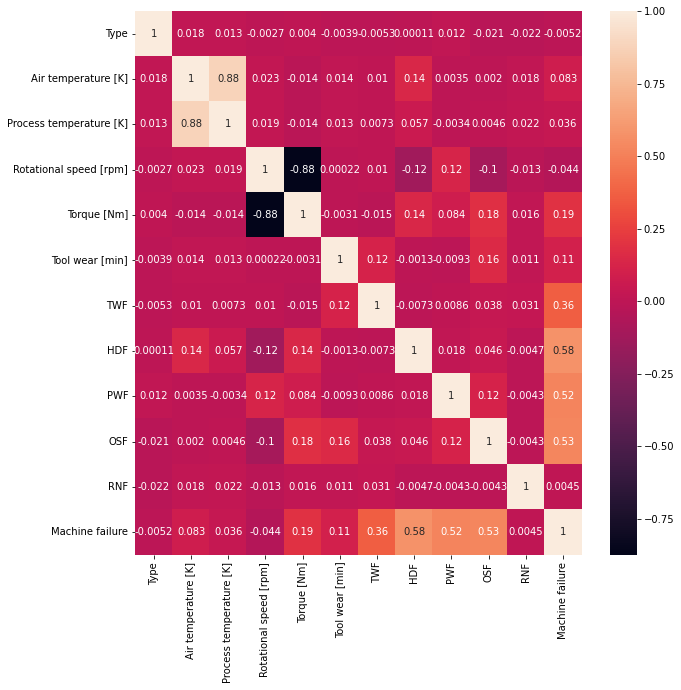

In [ ]:
import seaborn as sns

#correlation matrix
numeric_col = ['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
        'TWF', 'HDF', 'PWF', 'OSF', 'RNF','Machine failure']
# Correlation Matrix formation
corr_matrix = df.loc[:,numeric_col].corr()
print(corr_matrix)
#Using heatmap to visualize the correlation matrix
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr_matrix, annot=True,ax=ax)


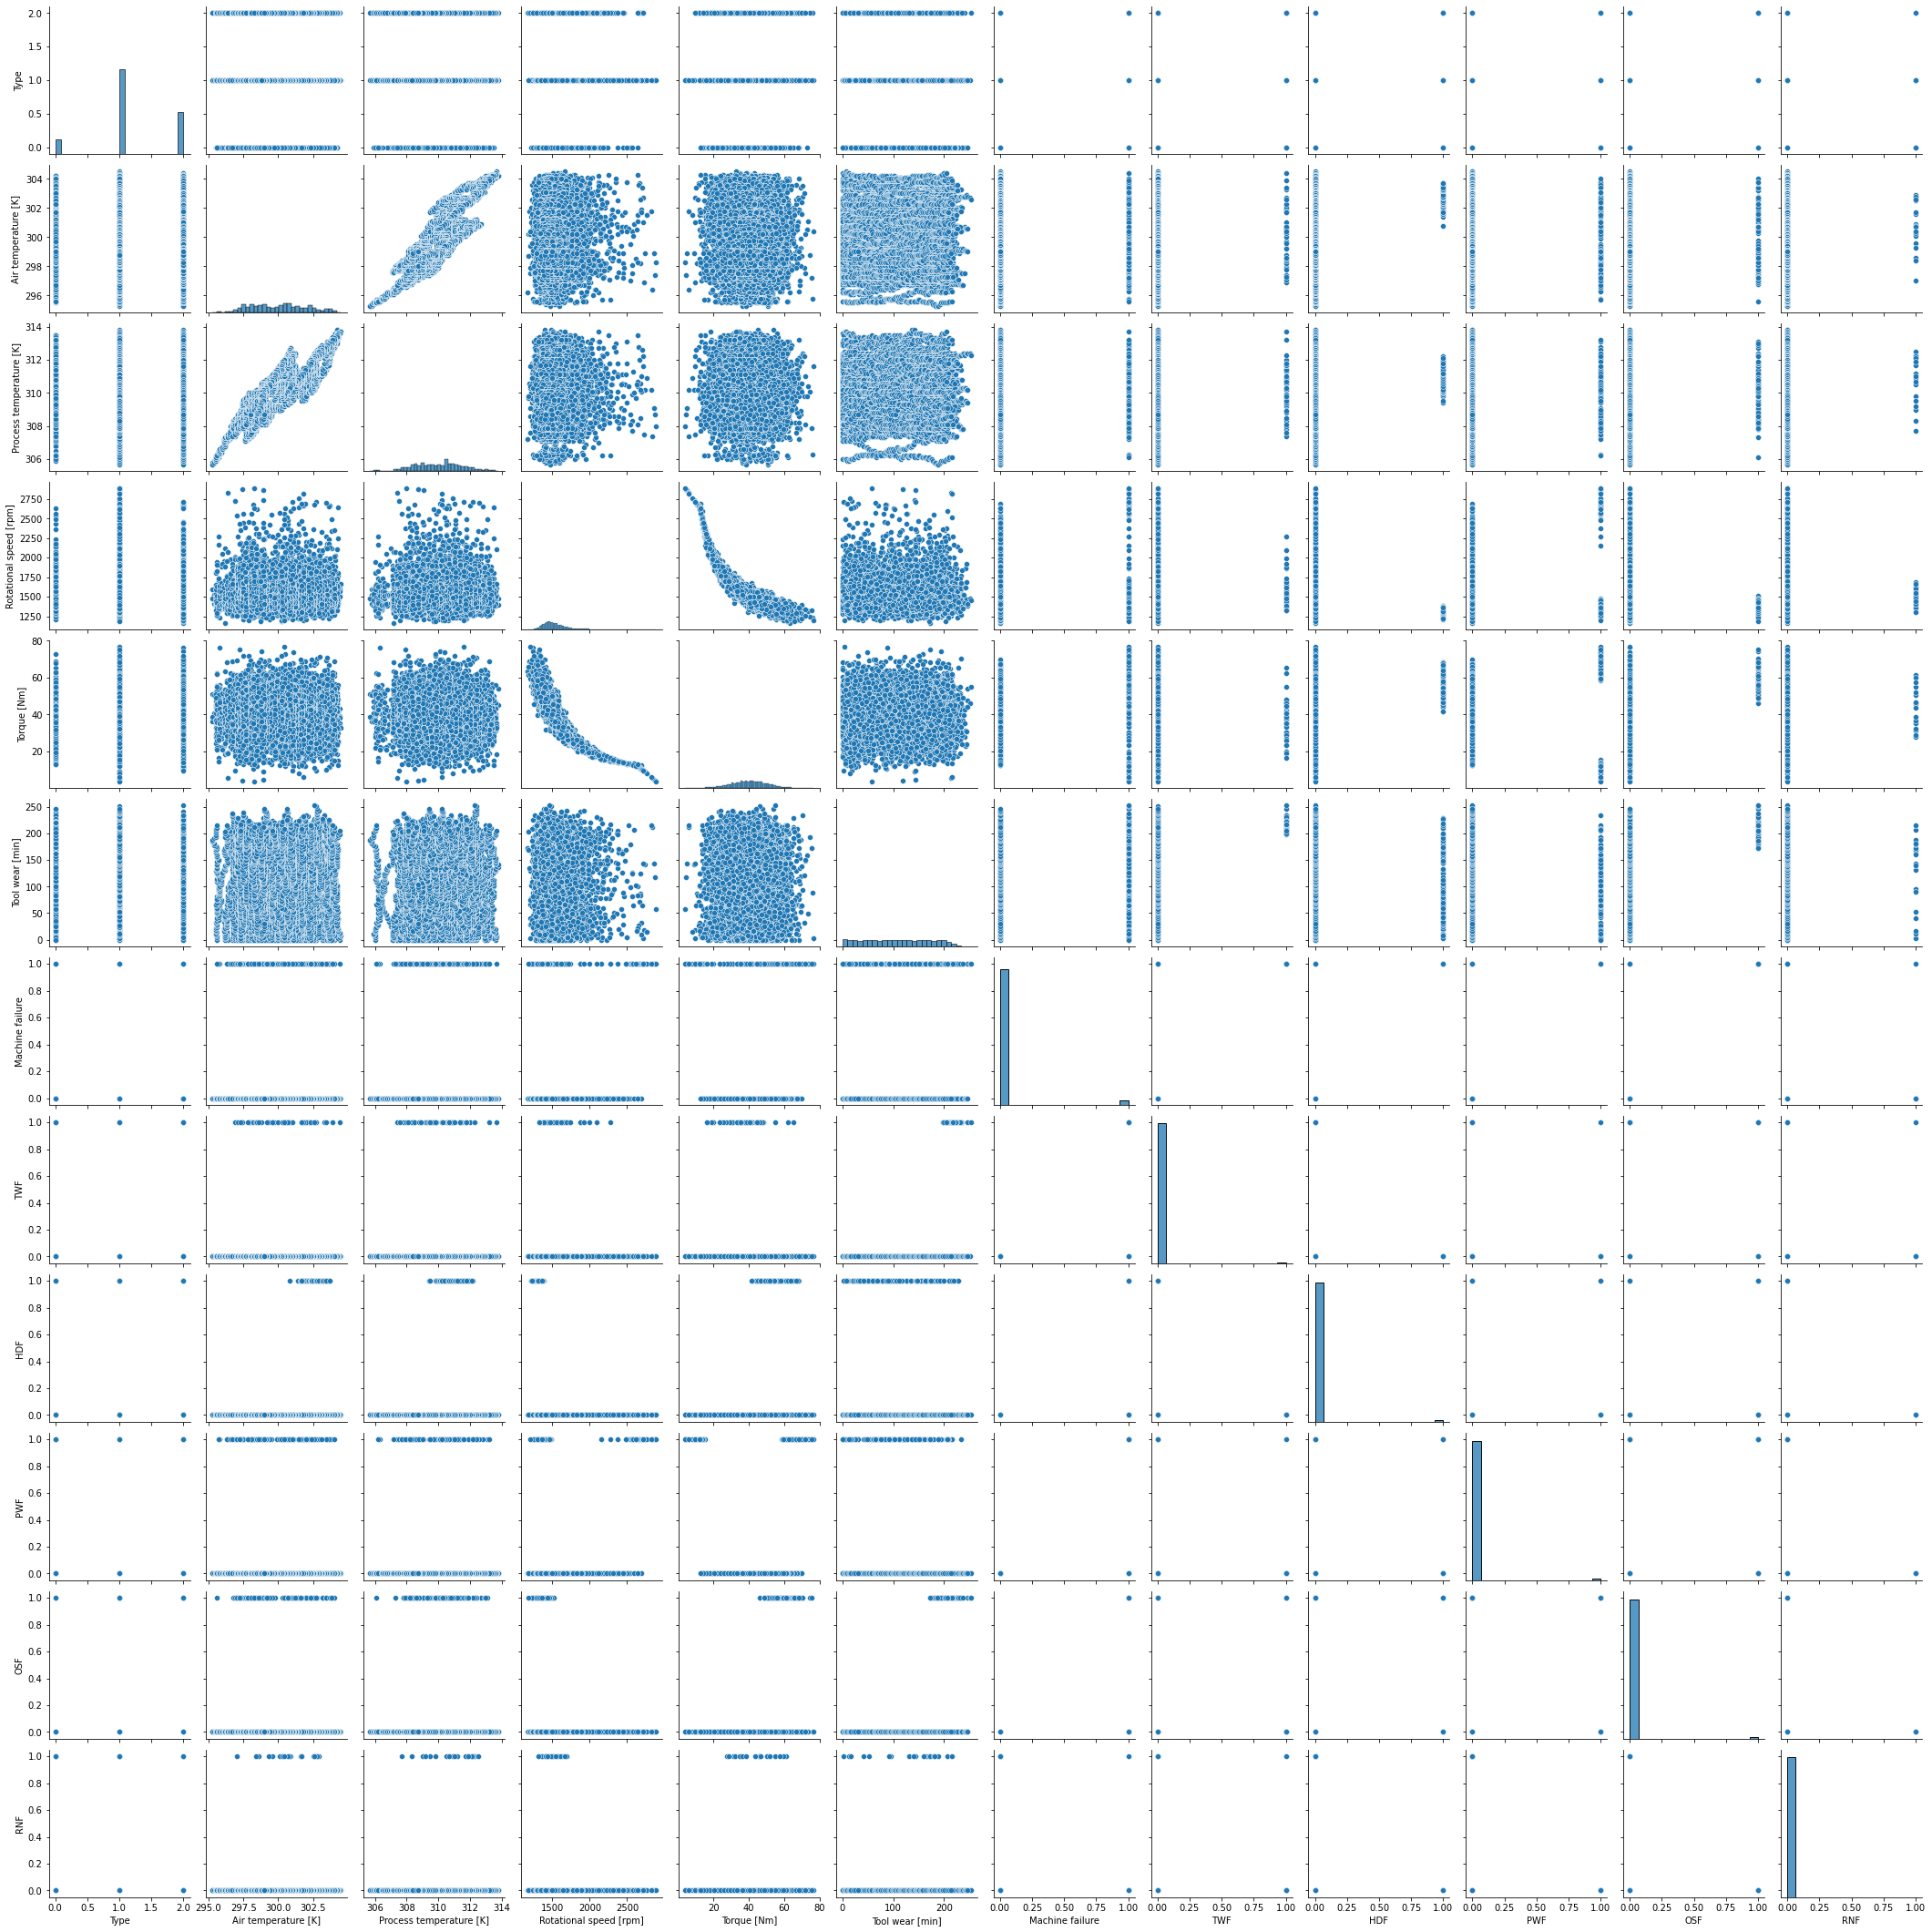

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df, kind="scatter")
plt.show()

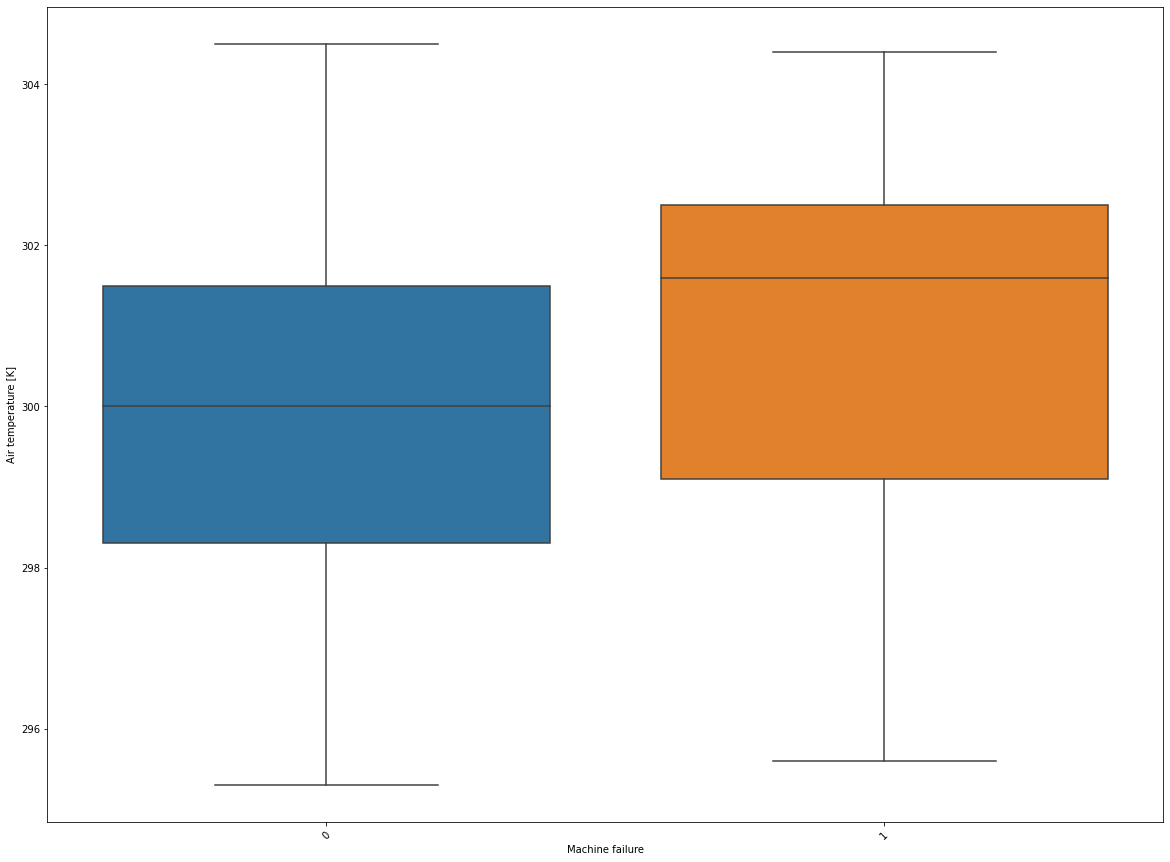

In [ ]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=45)
sns.boxplot(data = df, y = 'Air temperature [K]', x = 'Machine failure');

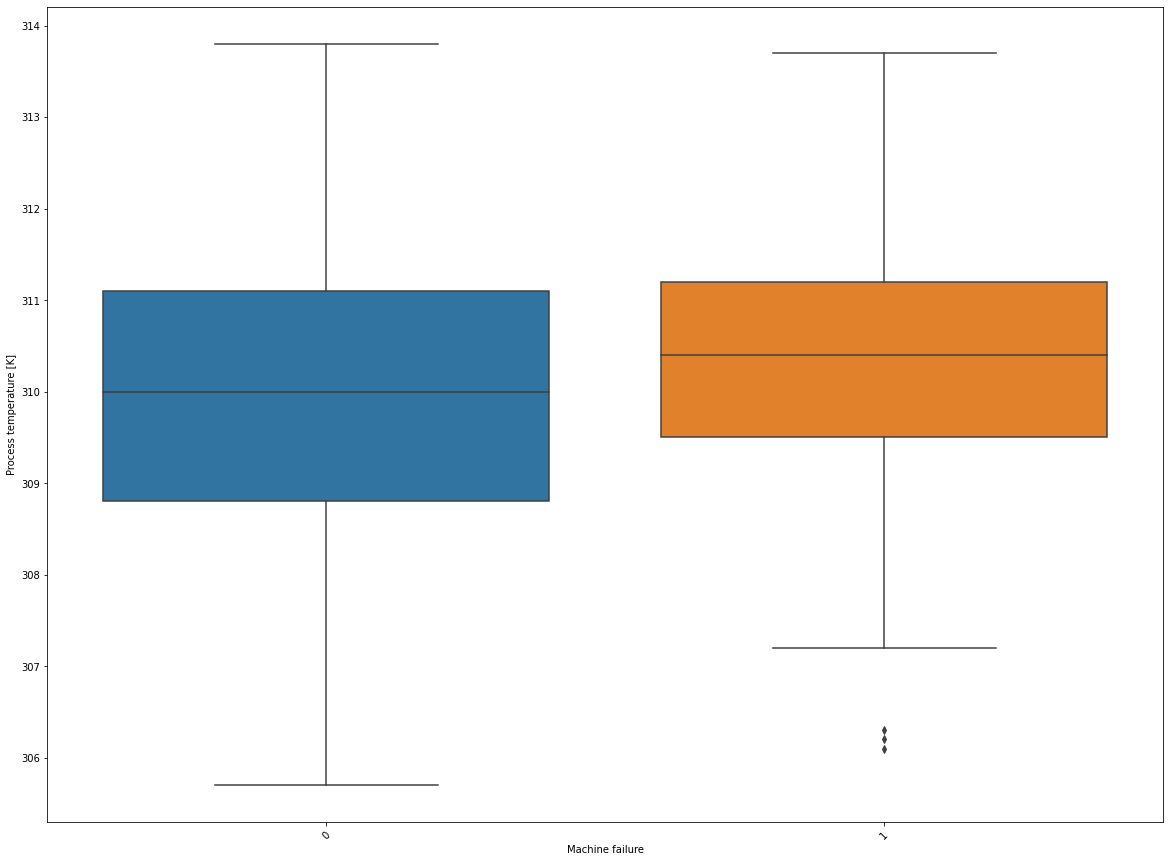

In [ ]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=45)
sns.boxplot(data = df, y = 'Process temperature [K]', x = 'Machine failure');

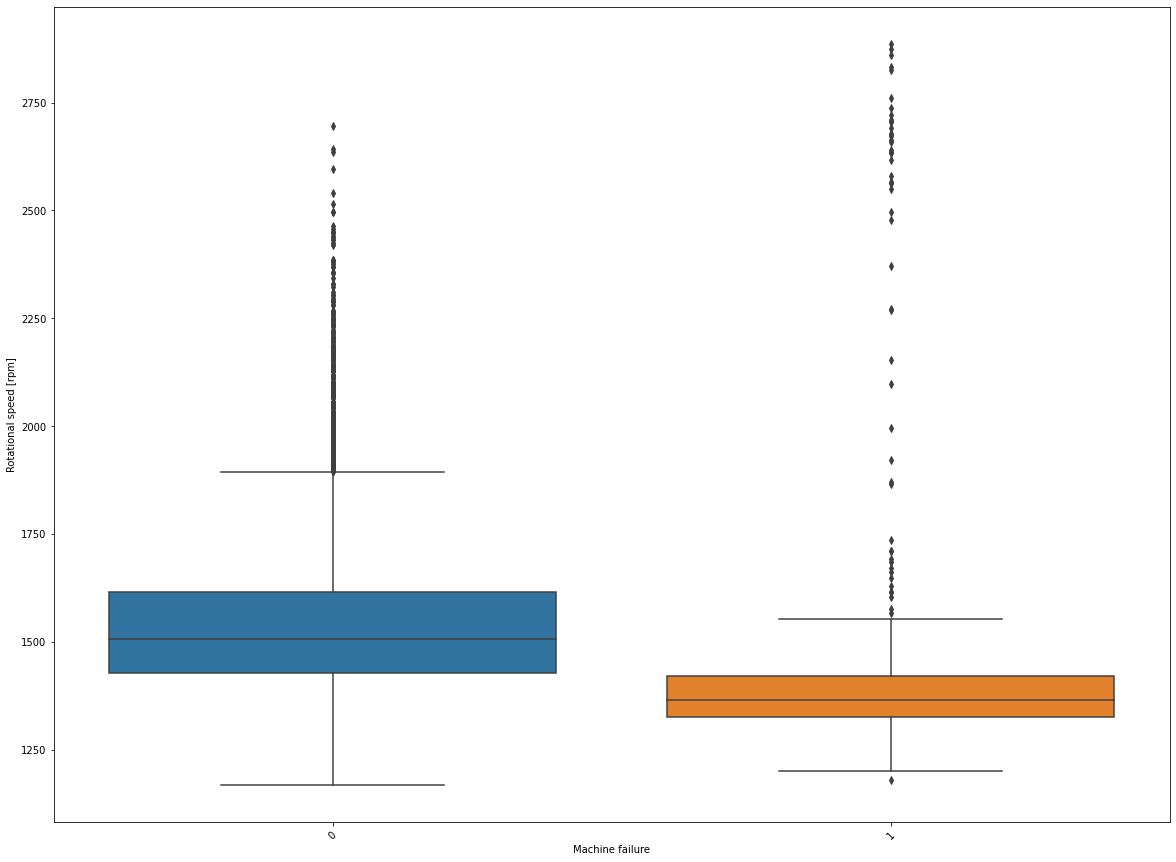

In [ ]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=45)
sns.boxplot(data = df, y = 'Rotational speed [rpm]', x = 'Machine failure');

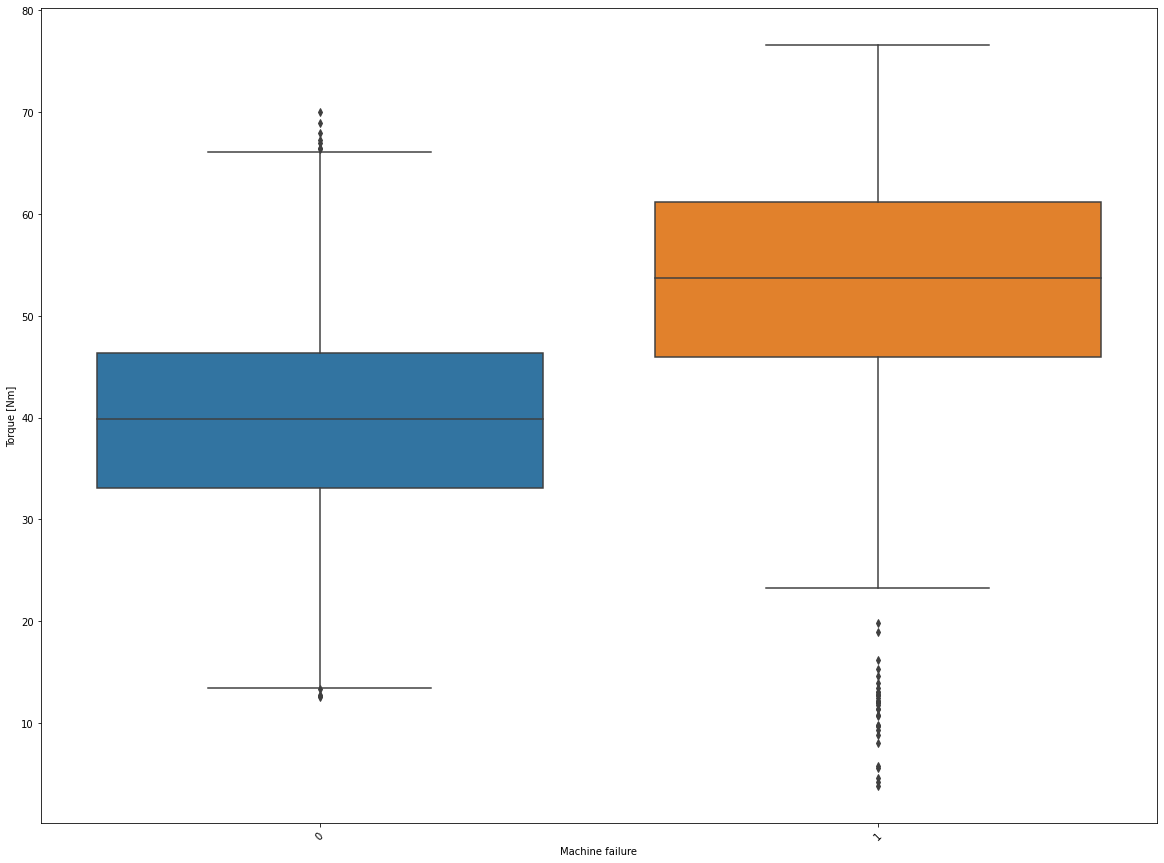

In [ ]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=45)
sns.boxplot(data = df, y = 'Torque [Nm]', x = 'Machine failure');

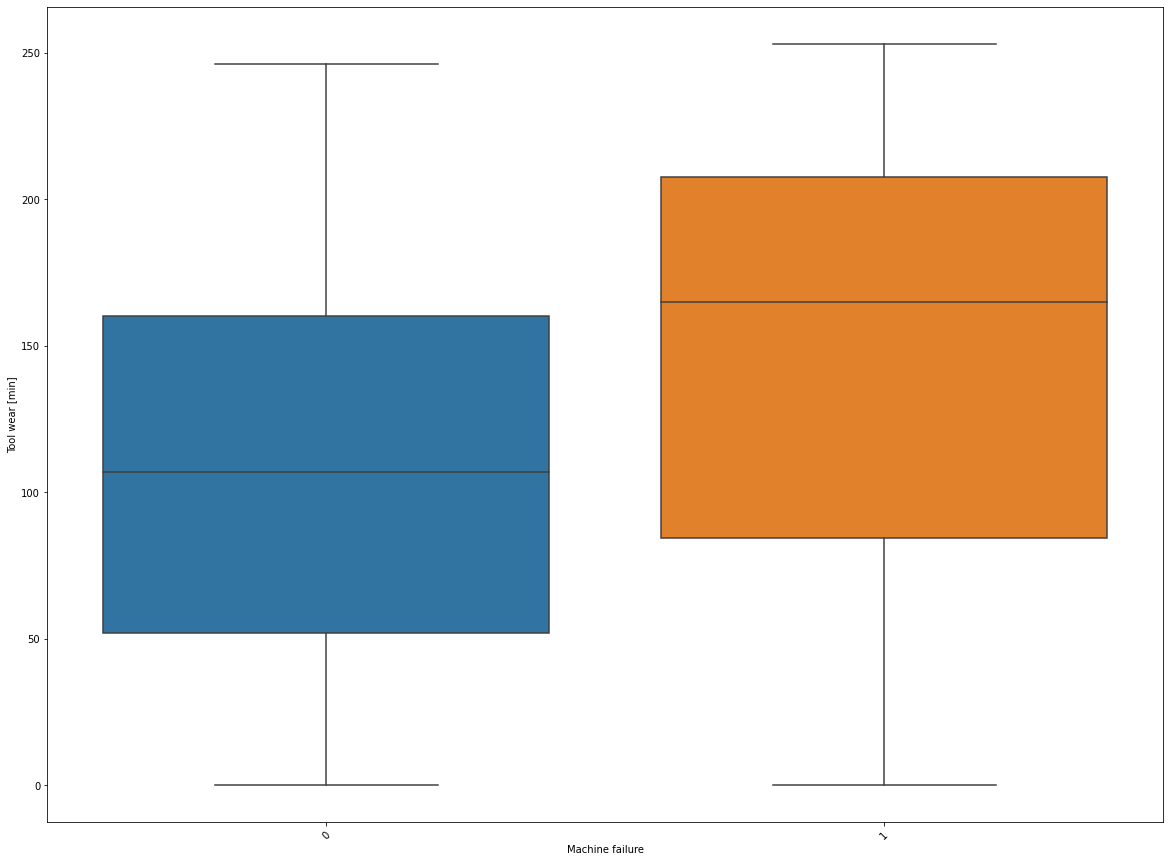

In [ ]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=45)
sns.boxplot(data = df, y = 'Tool wear [min]', x = 'Machine failure');

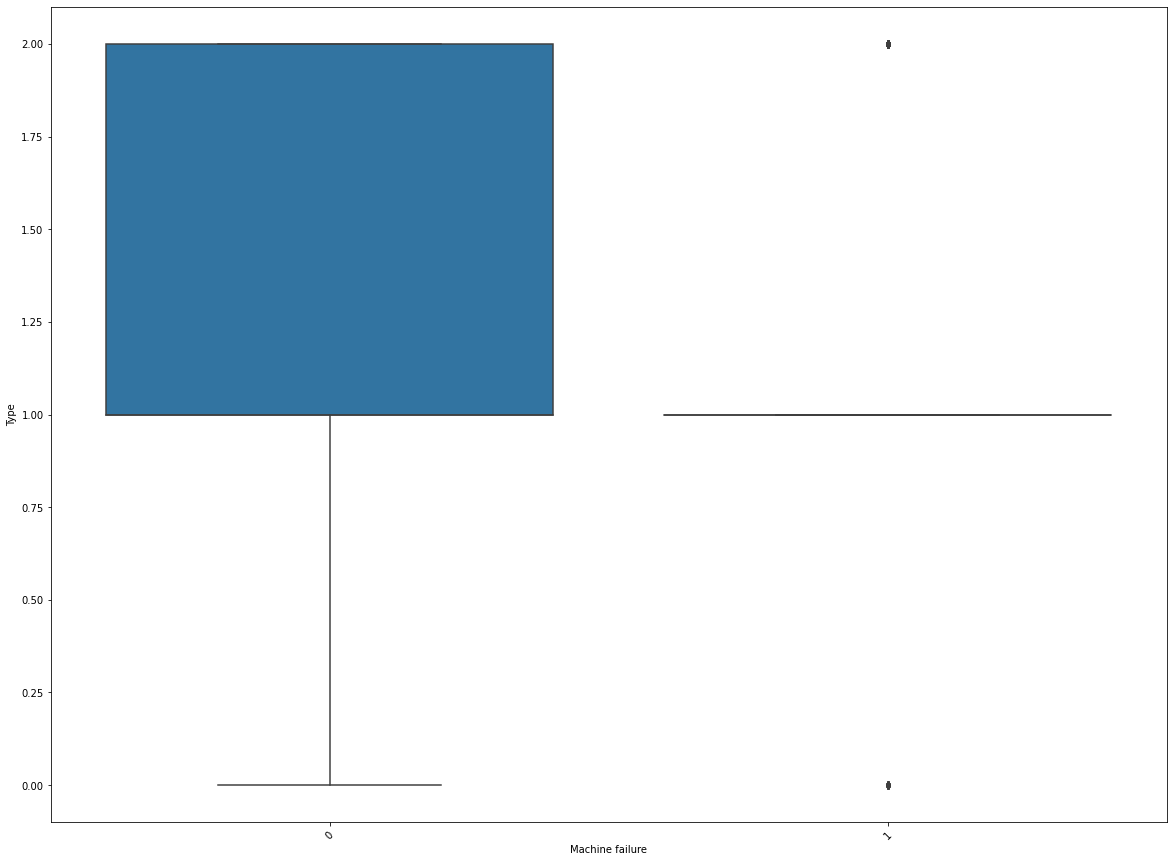

In [ ]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=45)
sns.boxplot(data = df, y = 'Type', x = 'Machine failure');

### BNN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import tensorflow_probability as tfp

visualizing data

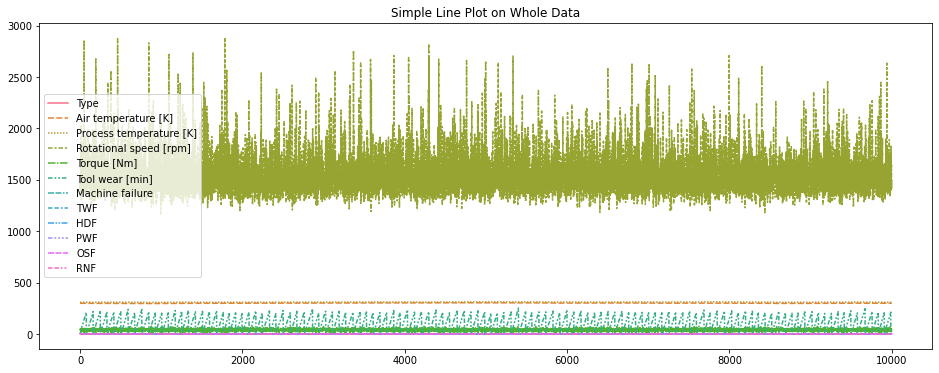

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(16,6))
plt.title("Simple Line Plot on Whole Data")
sns.lineplot(data=df)


Text(0.5, 1.0, 'Heatmap for Predictive Maintainence')

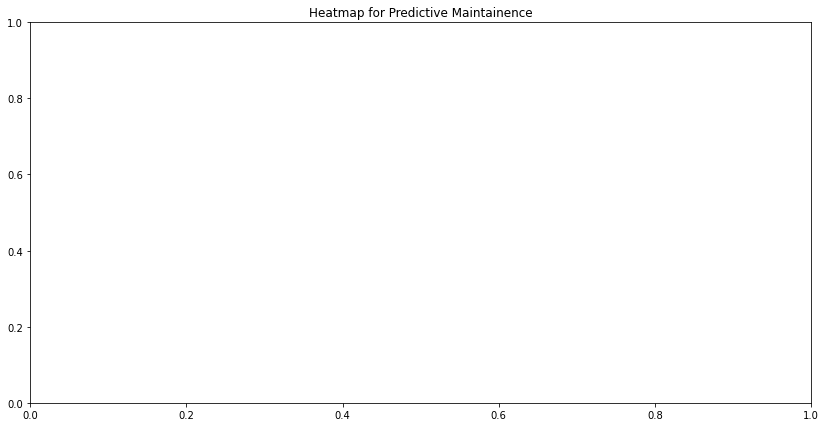

In [ ]:
#heatmaps on whole data
plt.figure(figsize=(14,7))
# Add title
plt.title("Heatmap for Predictive Maintainence")
# Heatmap
#sns.heatmap(data=df['Machine failure'], annot=True)
# Add label for horizontal axis
#plt.xlabel("Axis")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 89.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


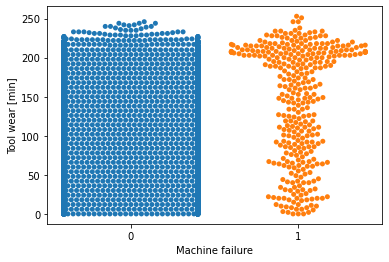

In [ ]:
sns.swarmplot(x=df['Machine failure'],y=df['Tool wear [min]'])

In [ ]:
#stripplot

Text(0.5, 1.0, 'KDE Distribution')

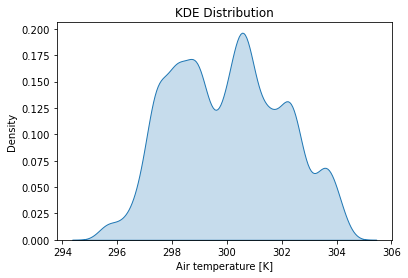

In [ ]:
#distribution
#for i in df:
sns.kdeplot(data=df['Air temperature [K]'], label='Air temperature [K]', shade=True)

plt.title('KDE Distribution')

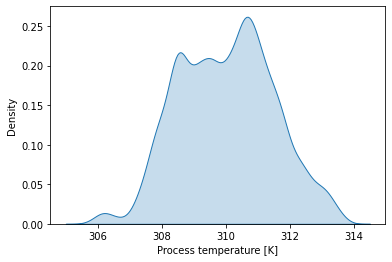

In [ ]:
sns.kdeplot(data=df['Process temperature [K]'], label='Process temperature [K]', shade=True)


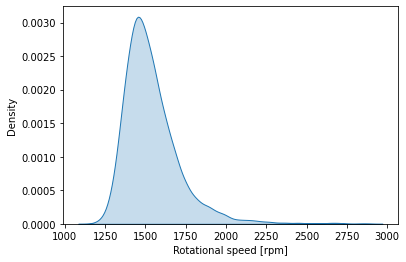

In [ ]:
sns.kdeplot(data=df['Rotational speed [rpm]'], label='Rotational speed [rpm]', shade=True)


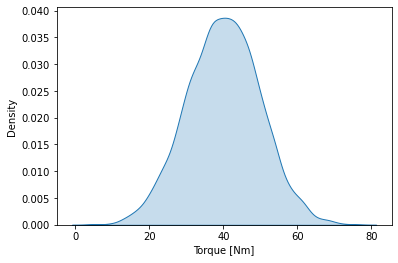

In [ ]:
sns.kdeplot(data=df['Torque [Nm]'], label='Torque [Nm]', shade=True)


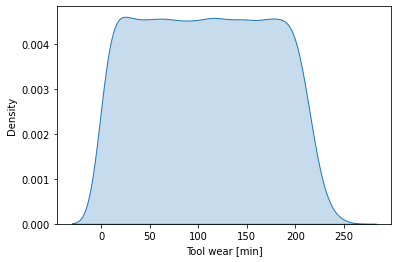

In [ ]:
sns.kdeplot(data=df['Tool wear [min]'], label='Tool wear [min]', shade=True)


#### Create training and evaluation datasets


In [ ]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

#first moving target variable "Machine Failure" to end and then defining X and y
df = df[['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
        'TWF', 'HDF', 'PWF', 'OSF', 'RNF','Machine failure']]
print(df.shape)
# excluding last variable for target variable
X = df.iloc[:, :-1]
print(X.shape)
# making last variable as target variable 
y = df.iloc[:, -1]
print(y.shape)
# using 70:30 split for making training and testing datasets and using random state as 42 to repeat this random split.
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.3,random_state=42)

(10000, 12)
(10000, 11)
(10000,)


In [ ]:
# the shapes of X_train,X_test,y_train,y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 11)
(3000, 11)
(7000,)
(3000,)


In [ ]:
print(X_train.shape)
print(y_train.shape)

(7000, 11)
(7000,)


In [ ]:
y_train.head()

9069    0
2603    0
7738    0
1579    0
5058    0
Name: Machine failure, dtype: int64

In [ ]:
# correct
#done
#train dataset
train_d = pd.DataFrame(X_train)
train_d['y_train'] = y_train
print(train_d.shape)
print(train_d.shape)

#test dataset
test_d = pd.DataFrame(X_test)
test_d['y_test'] = y_test
print(test_d.shape)
print(test_d.shape)

(7000, 12)
(7000, 12)
(3000, 12)
(3000, 12)


In [ ]:
train_d.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,y_train
9069,2.0,297.2,308.2,1678,28.1,133,0,0,0,0,0,0
2603,2.0,299.3,309.2,1334,46.3,31,0,0,0,0,0,0
7738,2.0,300.5,312.0,1263,60.8,146,0,0,0,0,0,0
1579,1.0,298.3,308.3,1444,43.8,176,0,0,0,0,0,0
5058,1.0,303.9,312.9,1526,42.5,194,0,0,0,0,0,0


In [ ]:
test_d.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,y_test
6252,1.0,300.8,310.3,1538,36.1,198,0,0,0,0,0,0
4684,2.0,303.6,311.8,1421,44.8,101,0,0,0,0,0,1
1731,2.0,298.3,307.9,1485,42.0,117,0,0,0,0,0,0
4742,1.0,303.3,311.3,1592,33.7,14,0,0,0,0,0,0
4521,1.0,302.4,310.4,1865,23.9,129,0,0,0,0,0,0


#### Compile, train, and evaluate the model


In [ ]:
# from here will write in the form of functions


#### Create model inputs


#### Experiment 1: standard neural network(Non-bayesian neural network)


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # to initialize NN
from keras.layers import Dense # to build layers

classifier = Sequential()
classifier.add(Dense(units = 5, input_dim = X_train.shape[1])) # changed this
classifier.add(Dense(units = 3, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = classifier.fit(X_train, y_train, epochs=50)
#validation_data = (np.asarray(X_test), np.asarray(y_test)),verbose=0
test_loss, test_acc = classifier.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)



Epoch 1/50
219/219 [==============================] - 1s 2ms/step - loss: 2.3689 - accuracy: 0.9649
Epoch 2/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1498 - accuracy: 0.9649
Epoch 3/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1486 - accuracy: 0.9649
Epoch 4/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1504 - accuracy: 0.9649
Epoch 5/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1492 - accuracy: 0.9649
Epoch 6/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1485 - accuracy: 0.9649
Epoch 7/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.9649
Epoch 8/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1484 - accuracy: 0.9649
Epoch 9/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1476 - accuracy: 0.9649
Epoch 10/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1485 - accuracy: 0.9649


train accuracy: 0.9649, loss: 0.1522 after 50 epochs
test accuracy: 0.9690, loss: 0.1385

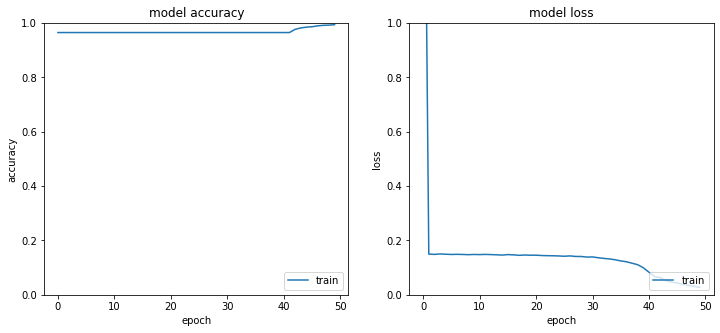

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.ylim(0, 1)
# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.ylim(0, 1)
plt.show()

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 65        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# checking the probabilities
probability_model = Sequential([classifier, tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)
predictions[0]

array([1.], dtype=float32)

In [ ]:
np.argmax(predictions[0])

0

In [ ]:
y_test[0]

0

In [ ]:
predictions

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
y_test.nunique

<bound method IndexOpsMixin.nunique of 6252    0
4684    1
1731    0
4742    0
4521    0
       ..
8014    0
1074    0
3063    0
6487    0
4705    0
Name: Machine failure, Length: 3000, dtype: int64>

#### Experiment 2: Bayesian neural network (BNN)


##### dependencies and prerequisites

In [ ]:
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()

import tensorflow_probability as tfp

sns.reset_defaults()
sns.set_context(context='talk',font_scale=0.7)
plt.rcParams['image.cmap'] = 'viridis'

%matplotlib inline

tfd = tfp.distributions
tfb = tfp.bijectors

##### define priors and other functions


In [ ]:
# to build the bnn

##### define bnn functions and class

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # to initialize NN
from keras.layers import Dense # to build layers
'''
classifier = Sequential()
classifier.add(Dense(units = 8, input_dim = X_train.shape[1])) # changed this
classifier.add(Dense(units = 4, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, epochs=100)
test_loss, test_acc = classifier.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

'''

"\nclassifier = Sequential()\nclassifier.add(Dense(units = 8, input_dim = X_train.shape[1])) # changed this\nclassifier.add(Dense(units = 4, activation = 'relu'))\nclassifier.add(Dense(units = 1, activation = 'sigmoid'))\nclassifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])\nclassifier.fit(X_train, y_train, epochs=100)\ntest_loss, test_acc = classifier.evaluate(X_test,  y_test, verbose=2)\nprint('\nTest accuracy:', test_acc)\n\n"

target is machine failure variable

In [ ]:
from sklearn.model_selection import train_test_split

#first moving target variable "Machine Failure" to end and then defining X and y
df = df[['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
        'TWF', 'HDF', 'PWF', 'OSF', 'RNF','Machine failure']]
print(df.shape)
# excluding last variable for target variable
X = df.iloc[:, :-1]
print(X.shape)
# making last variable as target variable 
y = df.iloc[:, -1]
print(y.shape)
# using 70:30 split for making training and testing datasets and using random state as 42 to repeat this random split.
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.3,random_state=42)

(10000, 12)
(10000, 11)
(10000,)


In [ ]:
dist = tfp.distributions 
dataset_size = len(X_train)
kl_divergence_function = (lambda q, p, _: dist.kl_divergence(q, p) / tf.cast(dataset_size, dtype=tf.float32))

model_tfp = tf.keras.Sequential([
    tf.keras.Input(X_train.shape[1]),
    tfp.layers.DenseFlipout(16, kernel_divergence_fn=kl_divergence_function),#, activation=tf.nn.relu),
    tfp.layers.DenseFlipout(6, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu ),
    tfp.layers.DenseFlipout(3, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.softmax),
])

learning_rate = 0.001
model_tfp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:102: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)
/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:112: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)


In [ ]:
model_tfp.fit(X_train, y_train, epochs=50)
test_loss, test_acc = model_tfp.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/50
219/219 [==============================] - 3s 2ms/step - loss: 0.9822 - accuracy: 0.1506
Epoch 2/50
219/219 [==============================] - 1s 2ms/step - loss: 0.5332 - accuracy: 0.0123
Epoch 3/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5301 - accuracy: 0.0060
Epoch 4/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5248 - accuracy: 0.0041
Epoch 5/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5218 - accuracy: 0.0024
Epoch 6/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5185 - accuracy: 0.0010
Epoch 7/50
219/219 [==============================] - 1s 2ms/step - loss: 0.5152 - accuracy: 7.1429e-04
Epoch 8/50
219/219 [==============================] - 1s 6ms/step - loss: 0.5123 - accuracy: 0.0119
Epoch 9/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5095 - accuracy: 0.0014
Epoch 10/50
219/219 [==============================] - 1s 6ms/step - loss: 0.5069 - accuracy: 0.

Test accuracy: 0.968666672706604 after 50 epochs and test loss: 0.450

In [ ]:
history = model_tfp.fit(np.asarray(X_train), np.asarray(y_train),epochs=50, validation_split=0.3,  shuffle=True)

Epoch 1/50
154/154 [==============================] - 2s 8ms/step - loss: 0.4591 - accuracy: 0.3527 - val_loss: 0.4603 - val_accuracy: 0.0367
Epoch 2/50
154/154 [==============================] - 1s 4ms/step - loss: 0.4596 - accuracy: 0.4965 - val_loss: 0.4600 - val_accuracy: 0.9633
Epoch 3/50
154/154 [==============================] - 1s 4ms/step - loss: 0.4584 - accuracy: 0.9602 - val_loss: 0.4598 - val_accuracy: 0.9629
Epoch 4/50
154/154 [==============================] - 1s 4ms/step - loss: 0.4591 - accuracy: 0.2557 - val_loss: 0.4617 - val_accuracy: 0.0367
Epoch 5/50
154/154 [==============================] - 1s 4ms/step - loss: 0.4579 - accuracy: 0.4098 - val_loss: 0.4592 - val_accuracy: 0.9633
Epoch 6/50
154/154 [==============================] - 1s 4ms/step - loss: 0.4585 - accuracy: 0.9592 - val_loss: 0.4589 - val_accuracy: 0.9633
Epoch 7/50
154/154 [==============================] - 1s 4ms/step - loss: 0.4573 - accuracy: 0.9655 - val_loss: 0.4586 - val_accuracy: 0.9633
Epoch 

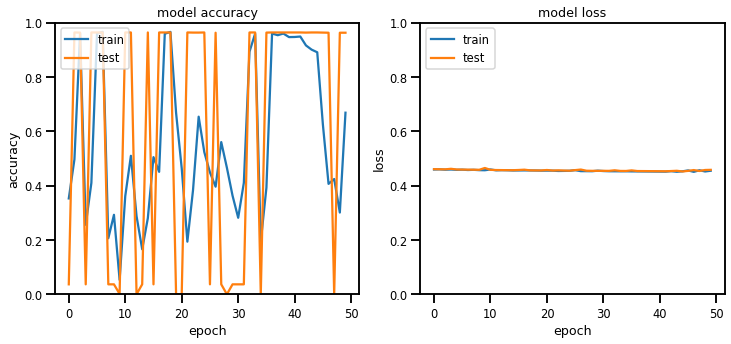

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1)
# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1)
plt.show()

In [ ]:
model_tfp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_flipout (DenseFlipout  (None, 16)               368       
 )                                                               
                                                                 
 dense_flipout_1 (DenseFlipo  (None, 6)                198       
 ut)                                                             
                                                                 
 dense_flipout_2 (DenseFlipo  (None, 3)                39        
 ut)                                                             
                                                                 
Total params: 605
Trainable params: 605
Non-trainable params: 0
_________________________________________________________________


define tensorboard variables for we plots

##### Train BNN with a small training subset.


##### Train BNN with the whole training set.


#####EXP VBNN:


In [ ]:
dist = tfp.distributions 
dataset_size = len(X_train)
kl_divergence_function = (lambda q, p, _: dist.kl_divergence(q, p) / tf.cast(dataset_size, dtype=tf.float32))

model_tfp_v1 = tf.keras.Sequential([
    tf.keras.Input(X_train.shape[1]),
    tfp.layers.DenseFlipout(14, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu),
    tfp.layers.DenseFlipout(6, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu ),
    tfp.layers.DenseFlipout(2, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.softmax),
])

learning_rate = 0.002
model_tfp_v1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:102: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)
/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:112: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)


In [ ]:
history = model_tfp_v1.fit(X_train, y_train, epochs=40)
test_loss, test_acc = model_tfp_v1.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)
# TRY REMOVING THE VALIDATION PART FROM THE FIT
# validation_data = (np.asarray(X_test), np.asarray(y_test))
#history = normal_bnn_model.fit(np.asarray(X_train), np.asarray(y_train),epochs=50,validation_split=0.2, shuffle=True)
# to see history:
# list all data in history
print(history.history.keys())
# summarize history for accuracy

#normal_bnn_model.save('model_tfp_v1.h5')
#normal_bnn_model.save('saved_model/model_tfp_v1')
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1)
# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1)
plt.show()
plot_model(model_tfp_v1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Epoch 1/40
219/219 [==============================] - 3s 3ms/step - loss: 1.0343 - accuracy: 0.8501
Epoch 2/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7779 - accuracy: 0.5510
Epoch 3/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7693 - accuracy: 0.1741
Epoch 4/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7632 - accuracy: 0.9186
Epoch 5/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7576 - accuracy: 0.8347
Epoch 6/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7526 - accuracy: 0.7073
Epoch 7/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7476 - accuracy: 0.5779
Epoch 8/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7443 - accuracy: 0.4279
Epoch 9/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7411 - accuracy: 0.5693
Epoch 10/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7391 - accuracy: 0.4860

In [ ]:
model_tfp_v1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_flipout_3 (DenseFlipo  (None, 14)               322       
 ut)                                                             
                                                                 
 dense_flipout_4 (DenseFlipo  (None, 6)                174       
 ut)                                                             
                                                                 
 dense_flipout_5 (DenseFlipo  (None, 2)                26        
 ut)                                                             
                                                                 
Total params: 522
Trainable params: 522
Non-trainable params: 0
_________________________________________________________________


In [ ]:
!pip install pickle5

     |████████████████████████████████| 256 kB 5.5 MB/s 


In [ ]:
import pickle
filename = 'model_tfp1v1.pkl'
tf.saved_model.SaveOptions(
    namespace_whitelist=None, save_debug_info=False, function_aliases=None,
    experimental_io_device=None, experimental_variable_policy=None,
    experimental_custom_gradients=True
)
pickle.dump(model_tfp_v1, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://0620125d-b794-426e-b105-404d12c72c05/assets


In [ ]:
!mkdir -p saved_model

In [ ]:
#saving tensorflow model of version v1 to drive. download this and place it in 
#streamlit local folder and load it using tensorflow load model
model_tfp_v1.save('saved_model/model_tfp_v1')

INFO:tensorflow:Assets written to: saved_model/model_tfp_v1/assets


In [ ]:
#saving model into hdf5 format and load the same file using same loadmodel function
model_tfp_v1.save('model_tfp_v1.h5')

In [ ]:
# use this to load the model into local
new_model = tf.keras.models.load_model('saved_model/model_tfp_v1')

# Check its architecture
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_flipout_3 (DenseFlipo  (None, 14)               322       
 ut)                                                             
                                                                 
 dense_flipout_4 (DenseFlipo  (None, 6)                174       
 ut)                                                             
                                                                 
 dense_flipout_5 (DenseFlipo  (None, 2)                26        
 ut)                                                             
                                                                 
Total params: 522
Trainable params: 522
Non-trainable params: 0
_________________________________________________________________


In [ ]:
!pip3 install ann_visualizer
!pip install graphviz

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=054694aec2e23a5c4ee32b95bdff8760b221253a8b39b0a2a4f1f49246d34693
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


In [ ]:
from ann_visualizer.visualize import ann_viz;

#ann_viz(new_model, title="My first neural network")

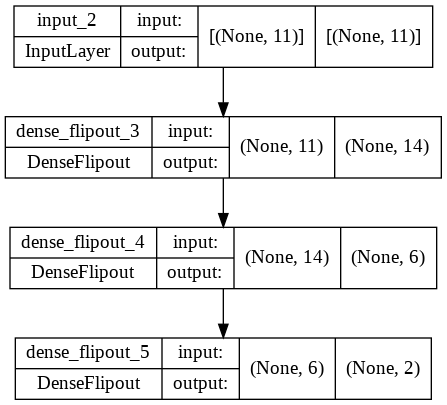

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(new_model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

#####v2

In [ ]:
dist = tfp.distributions 
dataset_size = len(X_train)
kl_divergence_function = (lambda q, p, _: dist.kl_divergence(q, p) / tf.cast(dataset_size, dtype=tf.float32))

model_tfp_v2 = tf.keras.Sequential([
    tf.keras.Input(X_train.shape[1]),
    tfp.layers.DenseFlipout(14, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu),
    tfp.layers.DenseFlipout(6, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu ),
    tfp.layers.DenseFlipout(2, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.softmax),
])

learning_rate = 0.005
model_tfp_v2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])

history = model_tfp_v2.fit(X_train, y_train, epochs=80)
test_loss, test_acc = model_tfp_v2.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# TRY REMOVING THE VALIDATION PART FROM THE FIT
# validation_data = (np.asarray(X_test), np.asarray(y_test))
#history = normal_bnn_model.fit(np.asarray(X_train), np.asarray(y_train),epochs=50,validation_split=0.2, shuffle=True)
# to see history:
# list all data in history
print(history.history.keys())
# summarize history for accuracy

normal_bnn_model.save('model_tfp_v2.h5')
normal_bnn_model.save('saved_model/model_tfp_v2')
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1)
# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1)
plt.show()
plot_model(model_tfp_v2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

model_tfp_v2.summary()

/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:102: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)
/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:112: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)


Epoch 1/80
219/219 [==============================] - 3s 3ms/step - loss: 0.9288 - accuracy: 0.4769
Epoch 2/80
219/219 [==============================] - 1s 3ms/step - loss: 0.7622 - accuracy: 0.5056
Epoch 3/80
219/219 [==============================] - 1s 3ms/step - loss: 0.7506 - accuracy: 0.3547
Epoch 4/80
219/219 [==============================] - 1s 3ms/step - loss: 0.7438 - accuracy: 0.4470
Epoch 5/80
219/219 [==============================] - 1s 3ms/step - loss: 0.7403 - accuracy: 0.4404
Epoch 6/80
219/219 [==============================] - 1s 3ms/step - loss: 0.7384 - accuracy: 0.5280
Epoch 7/80
219/219 [==============================] - 1s 3ms/step - loss: 0.7354 - accuracy: 0.4770
Epoch 8/80
219/219 [==============================] - 1s 3ms/step - loss: 0.7339 - accuracy: 0.5517
Epoch 9/80
219/219 [==============================] - 1s 3ms/step - loss: 0.7310 - accuracy: 0.5073
Epoch 10/80
219/219 [==============================] - 1s 3ms/step - loss: 0.7291 - accuracy: 0.5996

In [ ]:
#ann_viz(model_tfp_v2, title="My Second neural network")

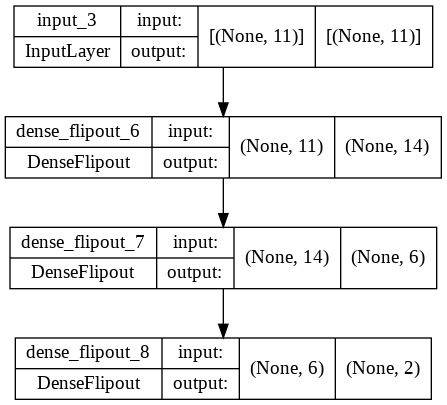

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model_tfp_v2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

##### visualize BNN

In [ ]:
!pip3 install keras
!pip3 install ann_visualizer
!pip install graphviz

Experiment 3: probabilistic Bayesian neural network: not needed


### DIFFERENT BNN'S
1. NORMAL BNN
2. BNN WITH DIFFERENT DROPOUTS
3. BNN WITH DIFFERENT EARLY STOPS
4. BNN WITH DIFFERENT REGULARIZERS
5. SIR mentioned to work on transformers also
6. MIXING OF THE ABOVE VARIANTS AND COMPARING WITH THE NORMAL ANN


PLOT THE UNCERTAINITIES FOR ALL THESE MODELS


#### 1. NORMAL BNN

In [ ]:
dist = tfp.distributions 
dataset_size = len(X_train)
kl_divergence_function = (lambda q, p, _: dist.kl_divergence(q, p) / tf.cast(dataset_size, dtype=tf.float32))

normal_bnn_model = tf.keras.Sequential([
    tf.keras.Input(X_train.shape[1]),
    tfp.layers.DenseFlipout(16, kernel_divergence_fn=kl_divergence_function ),#activation=tf.nn.relu),
    tfp.layers.DenseFlipout(6, kernel_divergence_fn=kl_divergence_function,activation=tf.nn.relu),
    tfp.layers.DenseFlipout(3, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.softmax),
])

learning_rate = 0.001
normal_bnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:102: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)
/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:112: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)


In [ ]:
# TRY REMOVING THE VALIDATION PART FROM THE FIT
# validation_data = (np.asarray(X_test), np.asarray(y_test))
history = normal_bnn_model.fit(np.asarray(X_train), np.asarray(y_train),epochs=50,validation_split=0.2, shuffle=True)
# to see history:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
test_loss, test_acc = normal_bnn_model.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

normal_bnn_model.save('normal_bnn_model.h5')
normal_bnn_model.save('saved_model/normal_bnn_model')


Epoch 1/50
175/175 [==============================] - 8s 20ms/step - loss: 0.7592 - accuracy: 0.7543 - val_loss: 0.5450 - val_accuracy: 0.9264
Epoch 2/50
175/175 [==============================] - 1s 6ms/step - loss: 0.5336 - accuracy: 0.9443 - val_loss: 0.5360 - val_accuracy: 0.9421
Epoch 3/50
175/175 [==============================] - 1s 6ms/step - loss: 0.5296 - accuracy: 0.9564 - val_loss: 0.5310 - val_accuracy: 0.9557
Epoch 4/50
175/175 [==============================] - 1s 5ms/step - loss: 0.5264 - accuracy: 0.1695 - val_loss: 0.5284 - val_accuracy: 0.0407
Epoch 5/50
175/175 [==============================] - 1s 4ms/step - loss: 0.5230 - accuracy: 0.5061 - val_loss: 0.5261 - val_accuracy: 0.9586
Epoch 6/50
175/175 [==============================] - 1s 3ms/step - loss: 0.5203 - accuracy: 0.9648 - val_loss: 0.5235 - val_accuracy: 0.9579
Epoch 7/50
175/175 [==============================] - 1s 3ms/step - loss: 0.5175 - accuracy: 0.3195 - val_loss: 0.5207 - val_accuracy: 7.1429e-04
E

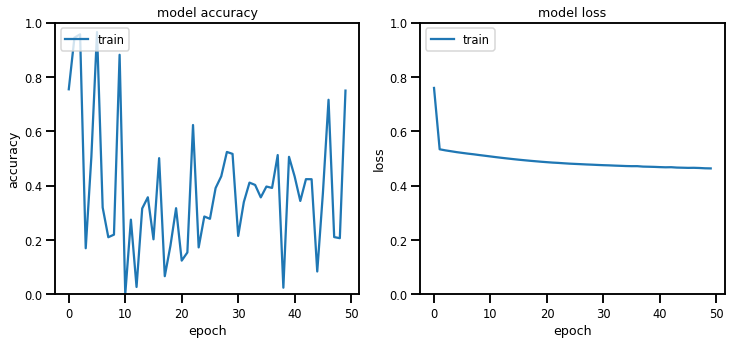

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1)
# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1)
plt.show()
plot_model(normal_bnn_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### NORMAL BNN2

In [ ]:
dist = tfp.distributions 
dataset_size = len(X_train)
kl_divergence_function = (lambda q, p, _: dist.kl_divergence(q, p) / tf.cast(dataset_size, dtype=tf.float32))

normal_bnn2_model = tf.keras.Sequential([
    tf.keras.Input(X_train.shape[1]),
    #Dense(units = 22, activation = 'relu'),
    tfp.layers.DenseFlipout(22, kernel_divergence_fn=kl_divergence_function),#activation=tf.nn.relu),
    tfp.layers.DenseFlipout(12, kernel_divergence_fn=kl_divergence_function),#activation=tf.nn.relu),
    tfp.layers.DenseFlipout(4, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu),
    tfp.layers.DenseFlipout(2, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.softmax),
])

learning_rate = 0.00065
normal_bnn2_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:102: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)
/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:112: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)


In [ ]:
# TRY REMOVING THE VALIDATION PART FROM THE FIT
# validation_data = (np.asarray(X_test), np.asarray(y_test))
history = normal_bnn2_model.fit(np.asarray(X_train), np.asarray(y_train),epochs=100)#,validation_split=0.2, shuffle=True)
# to see history:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
test_loss, test_acc = normal_bnn_model.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)



Epoch 1/100
219/219 [==============================] - 4s 4ms/step - loss: 1.5269 - accuracy: 0.9189
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 0.8964 - accuracy: 0.9626
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 0.8907 - accuracy: 0.9610
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 0.8869 - accuracy: 0.9440
Epoch 5/100
219/219 [==============================] - 1s 5ms/step - loss: 0.8837 - accuracy: 0.0369
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 0.8806 - accuracy: 0.1746
Epoch 7/100
219/219 [==============================] - 1s 4ms/step - loss: 0.8765 - accuracy: 0.4774
Epoch 8/100
219/219 [==============================] - 1s 4ms/step - loss: 0.8729 - accuracy: 0.4361
Epoch 9/100
219/219 [==============================] - 1s 4ms/step - loss: 0.8687 - accuracy: 0.7367
Epoch 10/100
219/219 [==============================] - 1s 6ms/step - loss: 0.8649 - accura

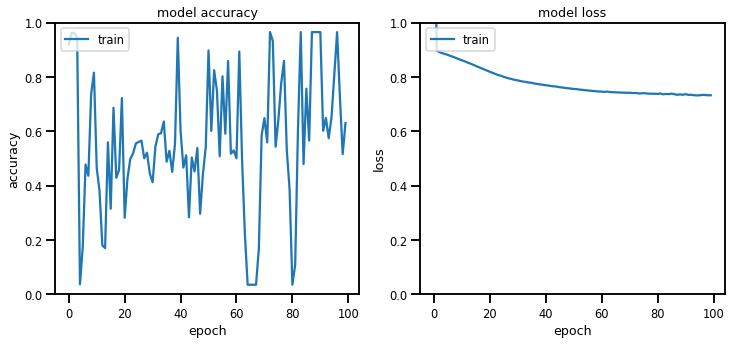

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1)
# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1)
plt.show()
plot_model(normal_bnn2_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
normal_bnn2_model.save('normal_bnn2_model.h5')
normal_bnn2_model.save('saved_model/normal_bnn2_model')

INFO:tensorflow:Assets written to: saved_model/normal_bnn2_model/assets


#### 2. BNN WITH DIFFERENT DROPOUT VALUES
MC Dropout write description here!

In [ ]:
dist = tfp.distributions 
dataset_size = len(X_train)
kl_divergence_function = (lambda q, p, _: dist.kl_divergence(q, p) / tf.cast(dataset_size, dtype=tf.float32))

model_dropout_v1 = tf.keras.Sequential([
    tf.keras.Input(X_train.shape[1]),
    tfp.layers.DenseFlipout(14, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tfp.layers.DenseFlipout(6, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu ),
    tfp.layers.DenseFlipout(2, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.softmax),
])

learning_rate = 0.005
model_dropout_v1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:102: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)
/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:112: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)


In [ ]:
dist = tfp.distributions 
dataset_size = len(X_train)
kl_divergence_function = (lambda q, p, _: dist.kl_divergence(q, p) / tf.cast(dataset_size, dtype=tf.float32))

model_dropout_v2 = tf.keras.Sequential([
    tf.keras.Input(X_train.shape[1]),
    tfp.layers.DenseFlipout(14, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.35),
    tfp.layers.DenseFlipout(6, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu ),
    tfp.layers.DenseFlipout(2, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.softmax),
])

learning_rate = 0.005
model_dropout_v2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:102: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)
/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:112: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)


In [ ]:
dist = tfp.distributions 
dataset_size = len(X_train)
kl_divergence_function = (lambda q, p, _: dist.kl_divergence(q, p) / tf.cast(dataset_size, dtype=tf.float32))

model_dropout_v3 = tf.keras.Sequential([
    tf.keras.Input(X_train.shape[1]),
    tfp.layers.DenseFlipout(14, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tfp.layers.DenseFlipout(6, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu ),
    tfp.layers.DenseFlipout(2, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.softmax),
])

learning_rate = 0.005
model_dropout_v3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:102: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)
/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:112: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)


Epoch 1/40
219/219 [==============================] - 2s 11ms/step - loss: 0.4514 - accuracy: 0.5173
Epoch 2/40
219/219 [==============================] - 3s 12ms/step - loss: 0.4519 - accuracy: 0.8843
Epoch 3/40
219/219 [==============================] - 2s 8ms/step - loss: 0.4519 - accuracy: 0.4290
Epoch 4/40
219/219 [==============================] - 2s 8ms/step - loss: 0.4509 - accuracy: 0.5310
Epoch 5/40
219/219 [==============================] - 2s 9ms/step - loss: 0.4508 - accuracy: 0.5343
Epoch 6/40
219/219 [==============================] - 2s 8ms/step - loss: 0.4506 - accuracy: 0.9397
Epoch 7/40
219/219 [==============================] - 2s 7ms/step - loss: 0.4512 - accuracy: 0.4799
Epoch 8/40
219/219 [==============================] - 1s 7ms/step - loss: 0.4509 - accuracy: 0.2056
Epoch 9/40
219/219 [==============================] - 2s 7ms/step - loss: 0.4502 - accuracy: 0.7203
Epoch 10/40
219/219 [==============================] - 1s 6ms/step - loss: 0.4507 - accuracy: 0.95

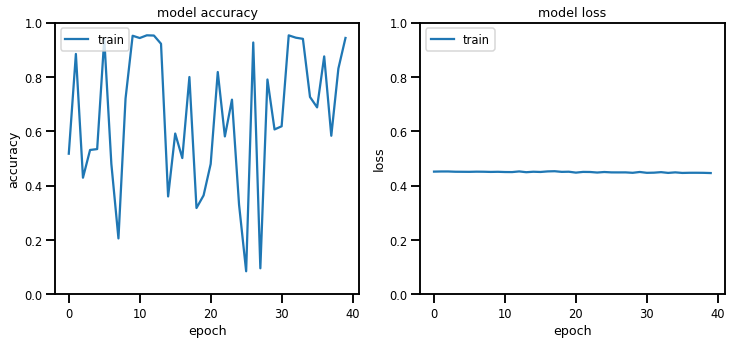

Epoch 1/40
219/219 [==============================] - 3s 3ms/step - loss: 0.7931 - accuracy: 0.5566
Epoch 2/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7574 - accuracy: 0.5627
Epoch 3/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7430 - accuracy: 0.4503
Epoch 4/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7350 - accuracy: 0.5343
Epoch 5/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7317 - accuracy: 0.4983
Epoch 6/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7304 - accuracy: 0.4087
Epoch 7/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7268 - accuracy: 0.4490
Epoch 8/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7240 - accuracy: 0.4600
Epoch 9/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7220 - accuracy: 0.4814
Epoch 10/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7210 - accuracy: 0.4533

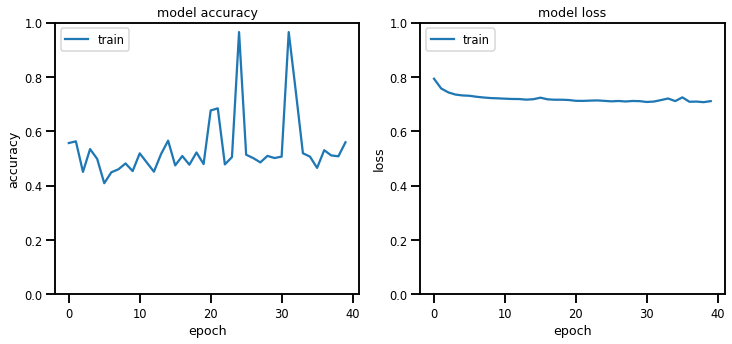

Epoch 1/40
219/219 [==============================] - 3s 3ms/step - loss: 0.8905 - accuracy: 0.1681
Epoch 2/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7628 - accuracy: 0.4763
Epoch 3/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7526 - accuracy: 0.3531
Epoch 4/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7452 - accuracy: 0.5283
Epoch 5/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7410 - accuracy: 0.4629
Epoch 6/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7379 - accuracy: 0.3887
Epoch 7/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7359 - accuracy: 0.5039
Epoch 8/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7338 - accuracy: 0.5487
Epoch 9/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7318 - accuracy: 0.5104
Epoch 10/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7307 - accuracy: 0.5406

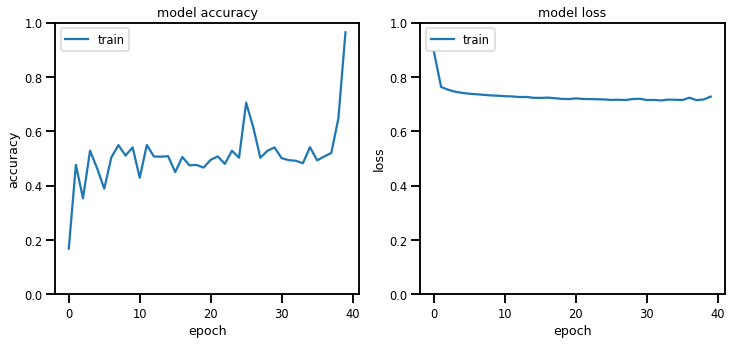

Epoch 1/40
219/219 [==============================] - 3s 3ms/step - loss: 0.9798 - accuracy: 0.3796
Epoch 2/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7647 - accuracy: 0.1999
Epoch 3/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7541 - accuracy: 0.4854
Epoch 4/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7463 - accuracy: 0.4646
Epoch 5/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7426 - accuracy: 0.3627
Epoch 6/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7398 - accuracy: 0.3646
Epoch 7/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7378 - accuracy: 0.5393
Epoch 8/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7352 - accuracy: 0.5384
Epoch 9/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7327 - accuracy: 0.4614
Epoch 10/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7305 - accuracy: 0.5299

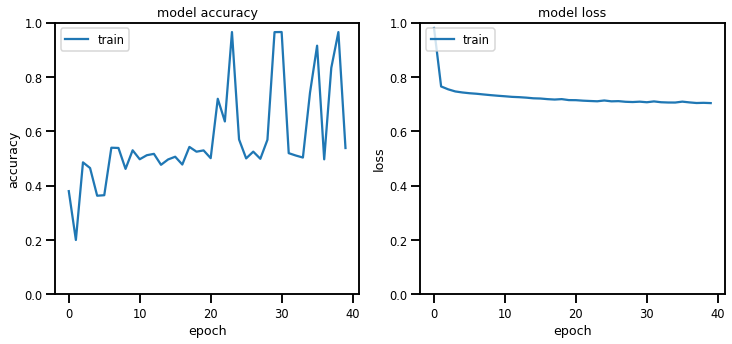

In [ ]:
from sklearn.metrics import classification_report

models = [normal_bnn_model,normal_bnn2_model,model_dropout_v1, model_dropout_v2, model_dropout_v3]

models_acc = []
models_loss = []
i = 1
for p_model in models:
    history = p_model.fit(X_train, y_train, epochs=40)#,batch_size=1,validation_data = (np.asarray(X_test), np.asarray(y_test)),verbose=0)
    #history = normal_bnn_model.fit(np.asarray(X_train), np.asarray(y_train),epochs=100, batch_size=1,validation_data = (np.asarray(X_test), np.asarray(y_test)),verbose=0)
    test_loss, test_acc = p_model.evaluate(X_test, y_test)
    y_pred = p_model.predict(X_test)
    print('\nTest accuracy:', test_acc)
    print('\nTest loss:', test_loss)
    models_acc.append(test_acc)
    models_loss.append(test_loss)
    #history = normal_bnn_model.fit(np.asarray(X_train), np.asarray(y_train),epochs=100, batch_size=1,verbose=0)
    # to see history:
    # list all data in history
    print(history.history.keys())
    p_model.save('%s.h5', p_model+''+i)
    p_model.save('saved_model/%s',p_model+''+i)
    # summarize history for accuracy
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.ylim(0, 1)
    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.ylim(0, 1)
    plt.show()
    plot_model(p_model, to_file='model_plotss.png', show_shapes=True, show_layer_names=True)
    '''index = 0
    for i in y_pred:
        if i<0.5:
            y_pred[index] = 0
        else:
            y_pred[index] = 1

    print(classification_report(y_test, y_pred))'''

In [ ]:
print(models_acc)
print(models_loss)

[0.968666672706604, 0.968999981880188, 0.968999981880188, 0.03099999949336052]
[0.44471046328544617, 0.7057655453681946, 0.709261953830719, 0.7031896114349365]


#### 3. BNN WITH DIFFERENT EARLY STOPS


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

#callbacks=[callback]
dist = tfp.distributions 
dataset_size = len(X_train)
kl_divergence_function = (lambda q, p, _: dist.kl_divergence(q, p) / tf.cast(dataset_size, dtype=tf.float32))

model_callback_v1 = tf.keras.Sequential([
    tf.keras.Input(X_train.shape[1]),
    tfp.layers.DenseFlipout(14, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu),
    #tf.keras.layers.Dropout(0.5)
    tfp.layers.DenseFlipout(6, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu ),
    tfp.layers.DenseFlipout(2, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.softmax),
])

learning_rate = 0.005
model_callback_v1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])
history = model_callback_v1.fit(np.asarray(X_train), np.asarray(y_train),epochs=80, batch_size=1, callbacks=[callback],verbose=0)
len(history.history['loss'])

#model_tfp_v2.fit(X_train, y_train, epochs=80)
test_loss, test_acc = model_callback_v1.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

model_callback_v1.summary()

/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:102: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)
/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:112: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)


94/94 [==============================] - 1s 2ms/step - loss: 0.7737 - accuracy: 0.9660

Test accuracy: 0.9660000205039978

Test loss: 0.7737000584602356
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_flipout_25 (DenseFlip  (None, 14)               322       
 out)                                                            
                                                                 
 dense_flipout_26 (DenseFlip  (None, 6)                174       
 out)                                                            
                                                                 
 dense_flipout_27 (DenseFlip  (None, 2)                26        
 out)                                                            
                                                                 
Total params: 522
Trainable params: 522
Non-trainable params: 0
__________________________________

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)

#callbacks=[callback]
dist = tfp.distributions 
dataset_size = len(X_train)
kl_divergence_function = (lambda q, p, _: dist.kl_divergence(q, p) / tf.cast(dataset_size, dtype=tf.float32))

model_callback_v2 = tf.keras.Sequential([
    tf.keras.Input(X_train.shape[1]),
    tfp.layers.DenseFlipout(14, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu),
    #tf.keras.layers.Dropout(0.5)
    tfp.layers.DenseFlipout(6, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu ),
    tfp.layers.DenseFlipout(2, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.softmax),
])

learning_rate = 0.005
model_callback_v2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])
history = model_callback_v2.fit(np.asarray(X_train), np.asarray(y_train),epochs=10, batch_size=1, callbacks=[callback],verbose=0)
len(history.history['loss'])

test_loss, test_acc = model_callback_v2.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)
model_callback_v2.summary()

/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:102: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)
/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:112: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)


94/94 [==============================] - 1s 2ms/step - loss: 0.9408 - accuracy: 0.9583

Test accuracy: 0.9583333134651184

Test loss: 0.9408320188522339
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_flipout_28 (DenseFlip  (None, 14)               322       
 out)                                                            
                                                                 
 dense_flipout_29 (DenseFlip  (None, 6)                174       
 out)                                                            
                                                                 
 dense_flipout_30 (DenseFlip  (None, 2)                26        
 out)                                                            
                                                                 
Total params: 522
Trainable params: 522
Non-trainable params: 0
__________________________________

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

#callbacks=[callback]
dist = tfp.distributions 
dataset_size = len(X_train)
kl_divergence_function = (lambda q, p, _: dist.kl_divergence(q, p) / tf.cast(dataset_size, dtype=tf.float32))

model_callback_v3 = tf.keras.Sequential([
    tf.keras.Input(X_train.shape[1]),
    tfp.layers.DenseFlipout(14, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu),
    #tf.keras.layers.Dropout(0.5)
    tfp.layers.DenseFlipout(6, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu ),
    tfp.layers.DenseFlipout(2, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.softmax),
])

learning_rate = 0.005
model_callback_v3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])
history = model_callback_v3.fit(np.asarray(X_train), np.asarray(y_train),epochs=10, batch_size=1, callbacks=[callback],verbose=0)
len(history.history['loss'])

test_loss, test_acc = model_callback_v3.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)
model_callback_v3.summary()

/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:102: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)
/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:112: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)


94/94 [==============================] - 1s 2ms/step - loss: 0.7158 - accuracy: 0.0313

Test accuracy: 0.03133333474397659

Test loss: 0.7158320546150208
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_flipout_31 (DenseFlip  (None, 14)               322       
 out)                                                            
                                                                 
 dense_flipout_32 (DenseFlip  (None, 6)                174       
 out)                                                            
                                                                 
 dense_flipout_33 (DenseFlip  (None, 2)                26        
 out)                                                            
                                                                 
Total params: 522
Trainable params: 522
Non-trainable params: 0
_________________________________

In [ ]:
from sklearn.metrics import classification_report

models = [normal_bnn_model,normal_bnn2_model,model_callback_v1, model_callback_v2, model_callback_v3]

models_acc = []
models_loss = []
i = 6
for p_model in models:
    history = p_model.fit(X_train, y_train, epochs=40)#,batch_size=1,validation_data = (np.asarray(X_test), np.asarray(y_test)),verbose=0)
    #history = normal_bnn_model.fit(np.asarray(X_train), np.asarray(y_train),epochs=100, batch_size=1,validation_data = (np.asarray(X_test), np.asarray(y_test)),verbose=0)
    test_loss, test_acc = p_model.evaluate(X_test, y_test)
    y_pred = p_model.predict(X_test)
    print('\nTest accuracy:', test_acc)
    print('\nTest loss:', test_loss)
    models_acc.append(test_acc)
    models_loss.append(test_loss)
    #history = normal_bnn_model.fit(np.asarray(X_train), np.asarray(y_train),epochs=100, batch_size=1,verbose=0)
    # to see history:
    # list all data in history
    print(history.history.keys())
    p_model.save('%s.h5', p_model+''+i)
    p_model.save('saved_model/%s',p_model+''+i)
    # summarize history for accuracy
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.ylim(0, 1)
    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.ylim(0, 1)
    plt.show()
    plot_model(p_model, to_file='model_plotsss.png', show_shapes=True, show_layer_names=True)
    '''index = 0
    for i in y_pred:
        if i<0.5:
            y_pred[index] = 0
        else:
            y_pred[index] = 1

    print(classification_report(y_test, y_pred))'''

#### 4. BNN WITH DIFFERENT REGULARIZERS


TRANSFORMERS

#### 6. MIXING OF THE ABOVE VARIANTS AND COMPARING WITH THE NORMAL ANN


#### w and b site
streamlit for gui

### WEEKLY OUTPUT PDFS

#### convert notebook to pdf 
for weekly progrss submission


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/MTP
!pwd
!ls

/content/drive/MyDrive/Colab Notebooks/MTP
/content/drive/MyDrive/Colab Notebooks/MTP
 3rd_sem1.pdf	     dec.pdf	        MTP_BNN.pdf		       w1.pdf
 3rd_sem.pdf	     material	        MTP_Data_Visualization.ipynb   w2.pdf
 4th_sem_MARCH.pdf   model_tfp1v1.pkl   READ.md			      'web app'
 4th_sem.pdf	     model_tfp_v1.h5    README.md
 datasets	     MTP_BNN.ipynb      saved_model


In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

In [ ]:
!jupyter nbconvert --to pdf --output "4th_sem_mid_FINAL" MTP_BNN.ipynb

[NbConvertApp] Converting notebook MTP_BNN.ipynb to pdf
[NbConvertApp] Support files will be in 4th_sem_mid_FINAL_files/
[NbConvertApp] Making directory ./4th_sem_mid_FINAL_files
[NbConvertApp] Making directory ./4th_sem_mid_FINAL_files
[NbConvertApp] Making directory ./4th_sem_mid_FINAL_files
[NbConvertApp] Making directory ./4th_sem_mid_FINAL_files
[NbConvertApp] Making directory ./4th_sem_mid_FINAL_files
[NbConvertApp] Making directory ./4th_sem_mid_FINAL_files
[NbConvertApp] Making directory ./4th_sem_mid_FINAL_files
[NbConvertApp] Making directory ./4th_sem_mid_FINAL_files
[NbConvertApp] Making directory ./4th_sem_mid_FINAL_files
[NbConvertApp] Making directory ./4th_sem_mid_FINAL_files
[NbConvertApp] Making directory ./4th_sem_mid_FINAL_files
[NbConvertApp] Making directory ./4th_sem_mid_FINAL_files
[NbConvertApp] Making directory ./4th_sem_mid_FINAL_files
[NbConvertApp] Making directory ./4th_sem_mid_FINAL_files
[NbConvertApp] Making directory ./4th_sem_mid_FINAL_files
[NbConver